⚙️ Configurações do experimento:
   test_size: 0.3
   smote_k_neighbors: 5
   rf_n_estimators: 100
   rf_max_depth: 10
   adversarial_epochs: 50
   adversarial_batch_size: 128
   adversarial_lambda: 0.1
   shap_sample_size: 500

🔧 Instalando bibliotecas necessárias...
✅ Instalação concluída!

📚 Importando bibliotecas...
✓ TensorFlow eager execution desabilitado (necessário para AdversarialDebiasing)
✅ Todas as bibliotecas importadas com sucesso!

📂 Carregamento do Dataset
📂 Carregando dataset local...

✅ Dataset carregado com sucesso!
   Shape: (1470, 35)
   Colunas: 35

📊 ANÁLISE EXPLORATÓRIA DOS DADOS

--- Informações Básicas ---
Total de registros: 1470
Total de features: 35

Primeiras linhas:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2



Tipos de dados:


int64     26
object     9
Name: count, dtype: int64


Valores missing:
✅ Nenhum valor missing!

--- Análise da Variável Target: ATTRITION ---

Distribuição:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

No: 83.88% | Yes: 16.12%


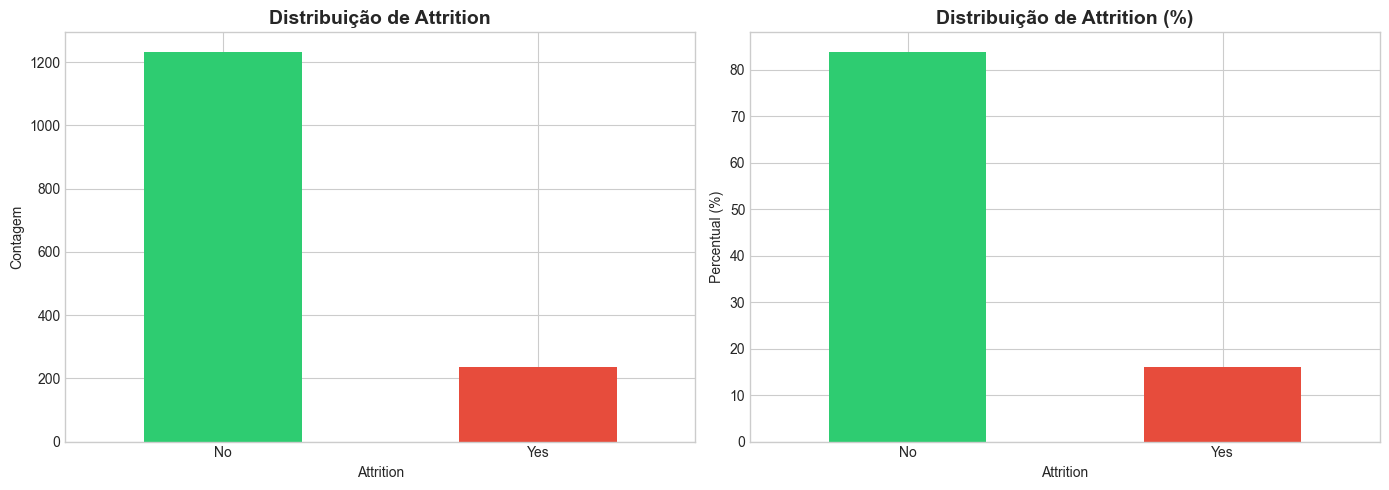


⚠️ Dataset DESBALANCEADO: 16.12% da classe positiva

--- Análise das Variáveis Sensíveis ---

🔹 GENDER:
Male: 60.00% | Female: 40.00%

Taxa de Attrition por Gender:


Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803



Teste Chi-quadrado: χ²=1.1170, p-value=0.2906


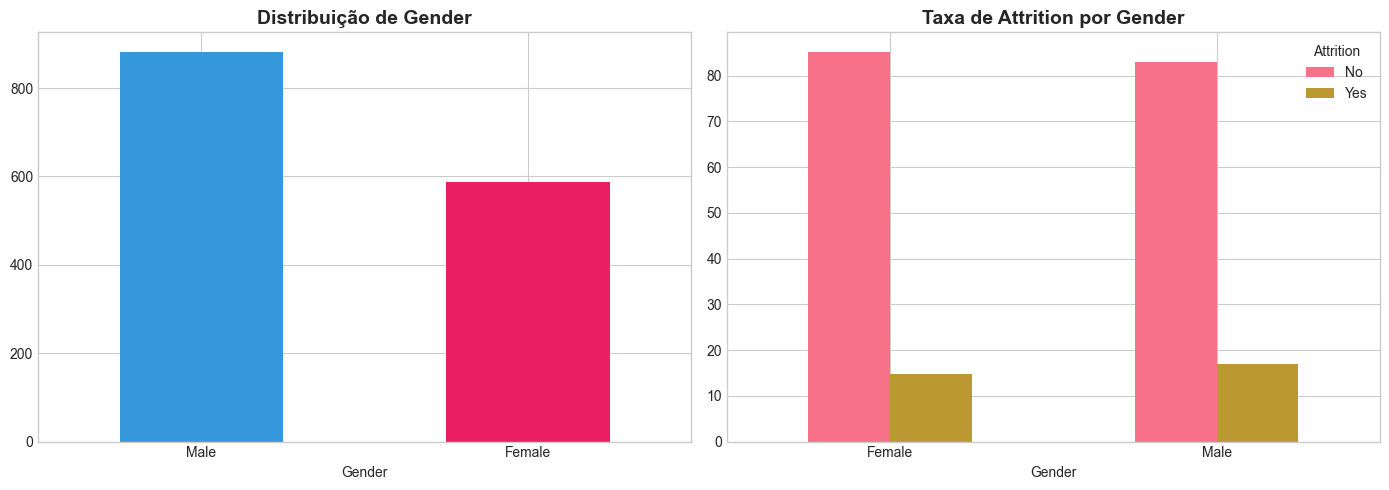


🔹 AGE:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

Taxa de Attrition por Age Group:


Attrition,No,Yes
AgeGroup,,
18-29,74.603175,25.396825
30-39,86.268174,13.731826
40-49,89.440994,10.559006
50+,87.412587,12.587413


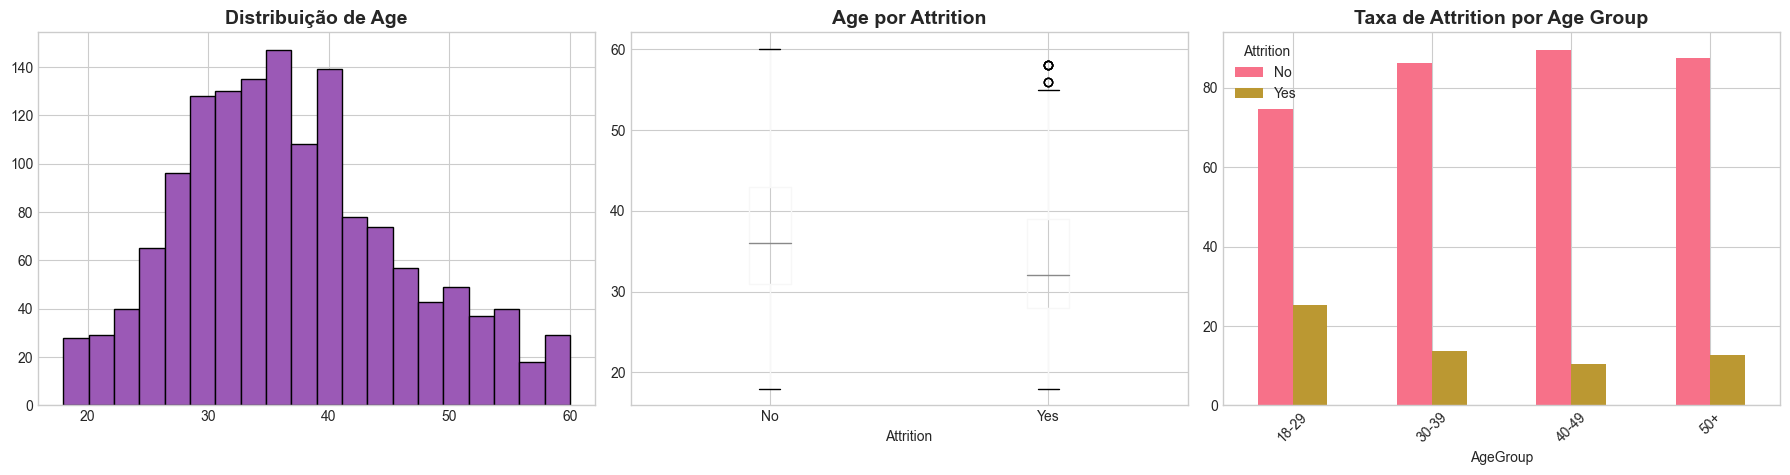


--- Identificação de Possíveis Proxies ---

🔹 JobRole vs Gender:


Gender,Female,Male
JobRole,,
Healthcare Representative,38.93,61.07
Human Resources,30.77,69.23
Laboratory Technician,32.82,67.18
Manager,46.08,53.92
Manufacturing Director,49.66,50.34
Research Director,41.25,58.75
Research Scientist,39.04,60.96
Sales Executive,40.49,59.51
Sales Representative,45.78,54.22



⚠️ JobRoles com forte viés de gênero (>70%):

🔧 PREPROCESSAMENTO DOS DADOS

📊 Features identificadas:
   - Categóricas: 7
   - Numéricas: 23

🔄 Aplicando encoding...

✅ Preprocessamento concluído!
   - Total de features: 30
   - Shape de X: (1470, 30)
   - Shape de y: (1470,)

📊 Split dos dados:
   - Treino: 1029 amostras (70.0%)
   - Teste: 441 amostras (30.0%)

✅ Normalização aplicada!

⚖️ TRATAMENTO DE DESBALANCEAMENTO - SMOTE

💡 O que é SMOTE (Synthetic Minority Over-sampling Technique)?

SMOTE cria exemplos sintéticos da classe minoritária (Attrition=Yes) para
balancear o dataset. Funciona assim:

1. Pega um exemplo da classe minoritária
2. Encontra seus K vizinhos mais próximos (da mesma classe)
3. Cria novos exemplos "entre" eles (interpolação)
4. Resultado: mais dados de "Yes" sem simplesmente duplicar

⚠️ IMPORTANTE: SMOTE só no conjunto de TREINO (não no teste!)
Por quê? Para não "vazar informação" e simular o cenário real.


📊 Distribuição ANTES do SMOTE:
   Treino - No: 86

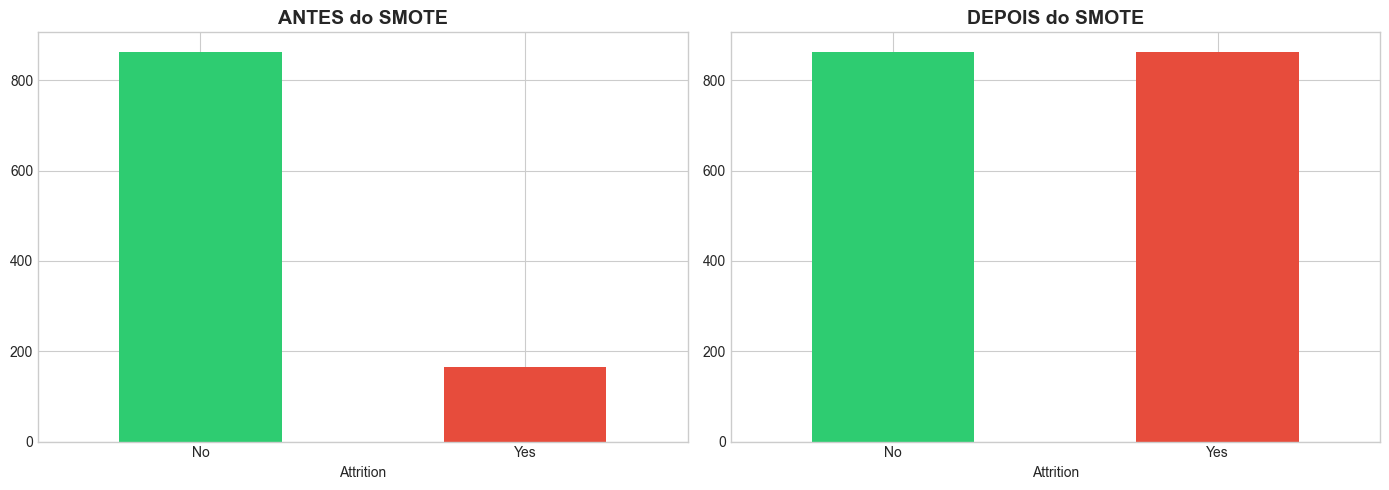


🎯 MODELOS BASELINE - SEM MITIGAÇÃO DE VIÉS

Vamos treinar DOIS modelos baseline para comparação:

1. BASELINE v1: Random Forest com class_weight='balanced'
   → Abordagem tradicional para desbalanceamento

2. BASELINE v2: Random Forest treinado com SMOTE
   → Abordagem com dados sintéticos balanceados

Depois compararemos qual funciona melhor!


🤖 BASELINE v1 - Random Forest com class_weight='balanced'
--------------------------------------------------------------------------------
✅ Accuracy: 0.8277 | F1: 0.7863 | AUC: 0.7514

🤖 BASELINE v2 - Random Forest com SMOTE
--------------------------------------------------------------------------------
✅ Accuracy: 0.8435 | F1: 0.8215 | AUC: 0.7652

📊 COMPARAÇÃO DOS BASELINES
--------------------------------------------------------------------------------


,Métrica,v1 (class_weight),v2 (SMOTE)
0,Accuracy,0.827664,0.843537
1,F1-Score,0.786288,0.821481
2,AUC-ROC,0.751427,0.765207



✅ Modelo selecionado: Baseline v2 (SMOTE)

📋 Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91       370
         Yes       0.53      0.27      0.36        71

    accuracy                           0.84       441
   macro avg       0.70      0.61      0.63       441
weighted avg       0.82      0.84      0.82       441


⚖️ MÉTRICAS DE FAIRNESS - BASELINE
--------------------------------------------------------------------------------

1. Demographic Parity: 0.0595
2. Disparate Impact: 2.0118
3. Equal Opportunity: 0.0632
4. Average Odds: 0.0626

🔍 ANÁLISE SHAP
--------------------------------------------------------------------------------

📊 Top 10 Features:


,Feature,SHAP_Importance
6,OverTime,0.070686
14,JobLevel,0.043829
29,YearsWithCurrManager,0.043254
22,StockOptionLevel,0.042909
5,MaritalStatus,0.037838
7,Age,0.030875
26,YearsAtCompany,0.030110
18,NumCompaniesWorked,0.027895
23,TotalWorkingYears,0.023634
11,EnvironmentSatisfaction,0.022088


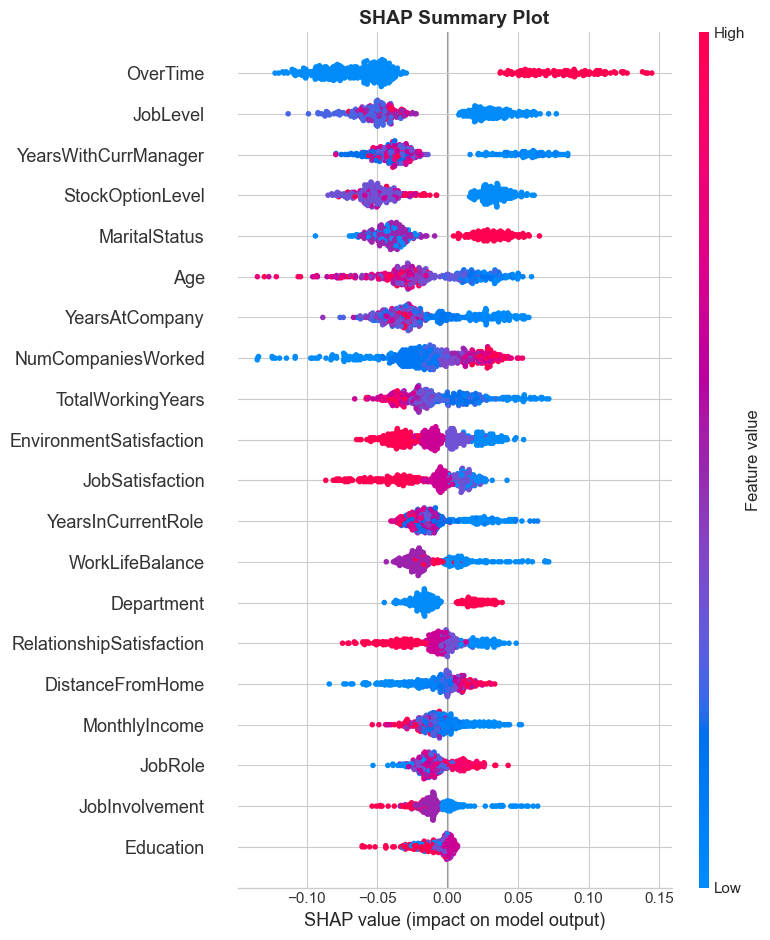


🤖 ADVERSARIAL DEBIASING - GRID SEARCH DE LAMBDA

💡 Vamos testar diferentes valores de λ (adversary_loss_weight) para encontrar
   o melhor trade-off entre performance e fairness!
   
   λ pequeno (0.01): Prioriza accuracy, menos fairness
   λ médio (0.1): Balanceado
   λ grande (0.5): Prioriza fairness, pode perder accuracy


📊 Testando λ = [0.01, 0.05, 0.1, 0.2, 0.5]

🔧 Treinando modelos adversariais...
--------------------------------------------------------------------------------

⏳ Testando λ = 0.01...
epoch 0; iter: 0; batch classifier loss: 0.722361; batch adversarial loss: 0.696276
epoch 1; iter: 0; batch classifier loss: 0.540199; batch adversarial loss: 0.625949
epoch 2; iter: 0; batch classifier loss: 0.568763; batch adversarial loss: 0.768451
epoch 3; iter: 0; batch classifier loss: 0.443842; batch adversarial loss: 0.716931
epoch 4; iter: 0; batch classifier loss: 0.445918; batch adversarial loss: 0.704490
epoch 5; iter: 0; batch classifier loss: 0.384341; batch adversari

,Lambda (λ),Accuracy,F1-Score,Demographic Parity,Disparate Impact,Equal Opportunity
0,0.01,0.843537,0.844838,0.060999,0.680929,0.005128
1,0.05,0.843537,0.843088,0.020862,1.138404,0.110256
2,0.10,0.839002,0.842809,0.025496,0.866636,0.142735
3,0.20,0.861678,0.862068,0.051884,1.361857,0.120513
4,0.50,0.859410,0.859410,0.007592,1.048025,0.021368



--------------------------------------------------------------------------------
🎯 SELECIONANDO MELHOR LAMBDA
--------------------------------------------------------------------------------

Critério de seleção (você pode ajustar):
1. Demographic Parity Difference < 0.1 (fairness aceitável)
2. Maior F1-Score possível
3. Disparate Impact entre 0.8 e 1.25


✓ 5 lambdas atingiram fairness < 0.1
   Selecionando lambda com MAIOR F1-Score entre eles:

🏆 MELHOR LAMBDA: 0.2
   • Accuracy: 0.8617
   • F1-Score: 0.8621
   • Demographic Parity: 0.0519
   • Disparate Impact: 1.3619

📊 Gerando visualizações...


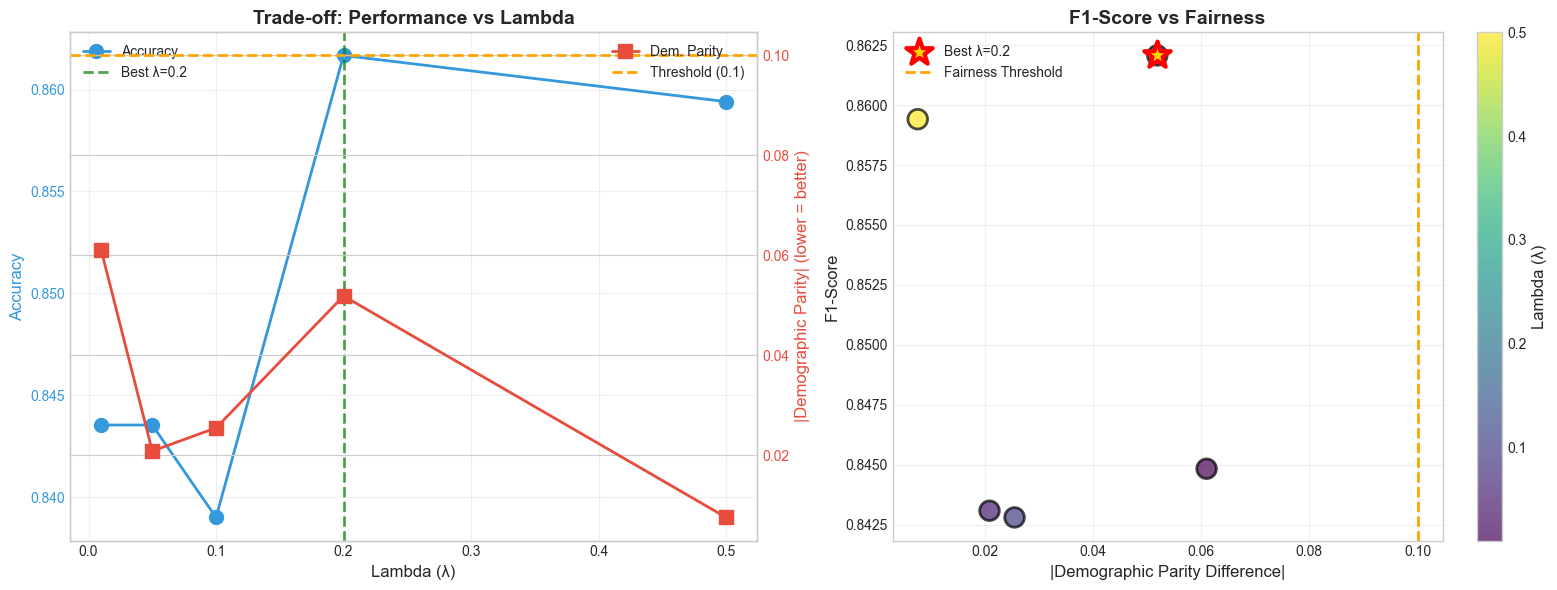


--------------------------------------------------------------------------------
📊 COMPARAÇÃO: BASELINE vs MELHOR ADVERSARIAL
--------------------------------------------------------------------------------


,Metric,Baseline,Adversarial (λ=0.2)
0,Accuracy,0.843537,0.861678
1,F1-Score,0.821481,0.862068
2,Demographic Parity,0.059520,0.051884
3,Disparate Impact,2.011834,1.361857


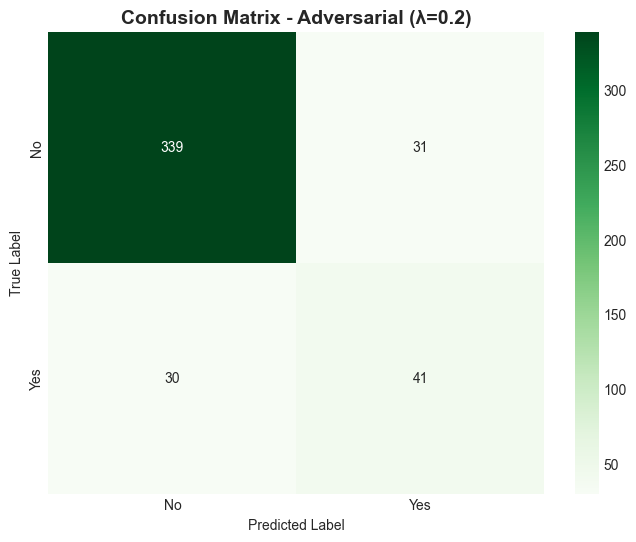


💡 INSIGHTS:
   • Lambda ótimo: 0.2
   • Perda de accuracy: -0.0181
   • Ganho em fairness: +0.0076
   • Trade-off: ✓ Aceitável

✅ Grid Search de Lambda concluído!

📊 COMPARAÇÃO FINAL


,Metric,Baseline,Adversarial,Difference
0,Accuracy,0.843537,0.861678,0.018141
1,F1-Score,0.821481,0.862068,0.040587


,Metric,Baseline,Adversarial
0,Demographic Parity,0.059520,0.051884
1,Disparate Impact,2.011834,1.361857
2,Equal Opportunity,0.063248,0.120513


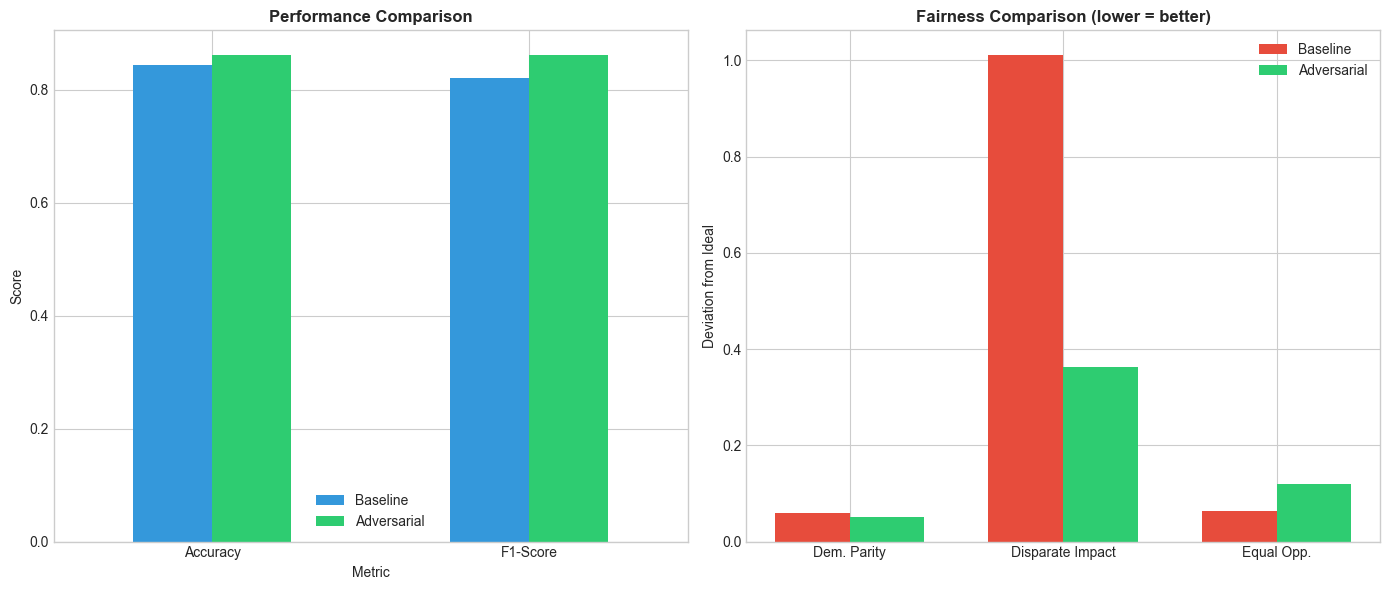


📋 RESUMO EXECUTIVO

DATASET: IBM HR Analytics (1470 amostras, 30 features)

BASELINE (Baseline v2 (SMOTE)):
• Accuracy: 0.8435
• F1-Score: 0.8215
• Demographic Parity: 0.0595

ADVERSARIAL DEBIASING:
• Accuracy: 0.8617 (Δ = +0.0181)
• F1-Score: 0.8621 (Δ = +0.0406)
• Demographic Parity: 0.0519 (Melhoria: 0.0076)

CONCLUSÃO:
✓ Trade-off aceitável: pequena perda de performance com ganho significativo em fairness

TOP 5 FEATURES (SHAP): OverTime, JobLevel, YearsWithCurrManager, StockOptionLevel, MaritalStatus


💬 DISCUSSÃO: LIMITAÇÕES E TRABALHOS FUTUROS

1. DESBALANCEAMENTO:
   ✓ Mitigado com class_weight e SMOTE
   ✓ Modelo selecionado: Baseline v2 (SMOTE)

2. TAMANHO DO DATASET:
   • 1470 amostras é adequado para a metodologia
   • Suficiente para demonstrar Adversarial Debiasing
   • Foco em metodologia, não big data

3. TRADE-OFFS:
   • Accuracy: +0.0181
   • Fairness: +0.0076



✅ ANÁLISE COMPLETA!

💾 SALVANDO RESULTADOS

💾 Salvando resultados...
   ✓ Métricas salvas
   ✓ 5 figuras 

In [ ]:
"""
================================================================================
TRABALHO FINAL - INTELIGÊNCIA ARTIFICIAL
Adversarial Debiasing para Mitigação de Vieses em ML
Dataset: IBM HR Analytics Employee Attrition
================================================================================

INSTRUÇÕES:
1. Certifique-se de que o dataset está em: data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv
2. Execute célula por célula (Shift+Enter)
3. Resultados serão salvos automaticamente em: results/

Autor: Christian Ferreira & Wanderley Rangel
Data: Dezembro/2025
================================================================================
"""

# ============================================================================
# CONFIGURAÇÕES E METADATA
# ============================================================================

import warnings
warnings.filterwarnings('ignore')

# Configuração de seeds para reprodutibilidade
RANDOM_STATE = 42

# Configurações do experimento
CONFIG = {
    'test_size': 0.3,
    'smote_k_neighbors': 5,
    'rf_n_estimators': 100,
    'rf_max_depth': 10,
    'adversarial_epochs': 50,
    'adversarial_batch_size': 128,
    'adversarial_lambda': 0.1,
    'shap_sample_size': 500
}

print("⚙️ Configurações do experimento:")
for key, value in CONFIG.items():
    print(f"   {key}: {value}")
print()

# ============================================================================
# SEÇÃO 1: INSTALAÇÃO DE DEPENDÊNCIAS
# ============================================================================

print("🔧 Instalando bibliotecas necessárias...")
print("=" * 80)

# Instalar bibliotecas de fairness e interpretabilidade
!pip install aif360 fairlearn shap imbalanced-learn -q

print("✅ Instalação concluída!\n")

# ============================================================================
# SEÇÃO 2: IMPORTAÇÃO DE BIBLIOTECAS
# ============================================================================

print("📚 Importando bibliotecas...")
print("=" * 80)

# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score,
                             classification_report, confusion_matrix)

# Balanceamento de classes
from imblearn.over_sampling import SMOTE

# TensorFlow - IMPORTANTE: Desabilitar eager execution ANTES de importar AIF360
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
print("✓ TensorFlow eager execution desabilitado (necessário para AdversarialDebiasing)")

# Fairness
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.inprocessing import AdversarialDebiasing

# Interpretabilidade
import shap

# Utilidades
from scipy.stats import chi2_contingency

print("✅ Todas as bibliotecas importadas com sucesso!\n")

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# ============================================================================
# SEÇÃO 3: CARREGAMENTO DO DATASET
# ============================================================================

print("📂 Carregamento do Dataset")
print("=" * 80)

# CARREGAR DATASET LOCAL
print("📂 Carregando dataset local...")

# Caminho para o arquivo CSV
dataset_path = '../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv'

try:
    # Carregar dataset
    df = pd.read_csv(dataset_path)
    
    # Verificar se carregou corretamente
    print(f"\n✅ Dataset carregado com sucesso!")
    print(f"   Shape: {df.shape}")
    print(f"   Colunas: {len(df.columns)}")
    
except FileNotFoundError:
    print(f"\n❌ ERRO: Arquivo não encontrado!")
    print(f"   Caminho esperado: {dataset_path}")
    print(f"\n   Certifique-se de que o arquivo CSV está na pasta 'data/raw/'")
    raise
except Exception as e:
    print(f"\n❌ ERRO ao carregar dataset: {str(e)}")
    raise

# ============================================================================
# SEÇÃO 4: ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("📊 ANÁLISE EXPLORATÓRIA DOS DADOS")
print("=" * 80)

# 4.1 Informações básicas
print("\n--- Informações Básicas ---")
print(f"Total de registros: {len(df)}")
print(f"Total de features: {df.shape[1]}")
print(f"\nPrimeiras linhas:")
display(df.head())

print(f"\nTipos de dados:")
display(df.dtypes.value_counts())

print(f"\nValores missing:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ Nenhum valor missing!")
else:
    display(missing[missing > 0])

# 4.2 Análise da Target (Attrition)
print("\n--- Análise da Variável Target: ATTRITION ---")
attrition_dist = df['Attrition'].value_counts()
attrition_pct = df['Attrition'].value_counts(normalize=True) * 100

print(f"\nDistribuição:")
print(attrition_dist)
print(f"\nNo: {attrition_pct['No']:.2f}% | Yes: {attrition_pct['Yes']:.2f}%")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

attrition_dist.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Contagem')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

attrition_pct.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Distribuição de Attrition (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

print(f"\n⚠️ Dataset DESBALANCEADO: {attrition_pct['Yes']:.2f}% da classe positiva")

# 4.3 Análise das Variáveis Sensíveis
print("\n--- Análise das Variáveis Sensíveis ---")

# GENDER
print("\n🔹 GENDER:")
gender_dist = df['Gender'].value_counts()
gender_pct = df['Gender'].value_counts(normalize=True) * 100
print(f"Male: {gender_pct['Male']:.2f}% | Female: {gender_pct['Female']:.2f}%")

gender_attrition = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
print(f"\nTaxa de Attrition por Gender:")
display(gender_attrition)

# Teste Chi-quadrado
chi2, p_value, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Attrition']))
print(f"\nTeste Chi-quadrado: χ²={chi2:.4f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("✓ Associação estatisticamente significativa com Attrition")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_dist.plot(kind='bar', ax=axes[0], color=['#3498db', '#e91e63'])
axes[0].set_title('Distribuição de Gender', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(gender_dist.index, rotation=0)

gender_attrition.plot(kind='bar', ax=axes[1], stacked=False)
axes[1].set_title('Taxa de Attrition por Gender', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(gender_attrition.index, rotation=0)
axes[1].legend(title='Attrition')

plt.tight_layout()
plt.show()

# AGE
print("\n🔹 AGE:")
print(df['Age'].describe())

# Criar grupos etários
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60],
                         labels=['18-29', '30-39', '40-49', '50+'])

age_attrition = pd.crosstab(df['AgeGroup'], df['Attrition'], normalize='index') * 100
print(f"\nTaxa de Attrition por Age Group:")
display(age_attrition)

# Visualização
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df['Age'].hist(bins=20, ax=axes[0], color='#9b59b6', edgecolor='black')
axes[0].set_title('Distribuição de Age', fontsize=14, fontweight='bold')

df.boxplot(column='Age', by='Attrition', ax=axes[1])
axes[1].set_title('Age por Attrition', fontsize=14, fontweight='bold')
plt.suptitle('')

age_attrition.plot(kind='bar', ax=axes[2], stacked=False)
axes[2].set_title('Taxa de Attrition por Age Group', fontsize=14, fontweight='bold')
axes[2].set_xticklabels(age_attrition.index, rotation=45)

plt.tight_layout()
plt.show()

# 4.4 Identificação de Proxies
print("\n--- Identificação de Possíveis Proxies ---")

# JobRole vs Gender
print("\n🔹 JobRole vs Gender:")
jobrole_gender = pd.crosstab(df['JobRole'], df['Gender'], normalize='index') * 100
display(jobrole_gender.round(2))

print("\n⚠️ JobRoles com forte viés de gênero (>70%):")
for role in jobrole_gender.index:
    if jobrole_gender.loc[role, 'Male'] > 70:
        print(f"   - {role}: {jobrole_gender.loc[role, 'Male']:.1f}% Male")
    elif jobrole_gender.loc[role, 'Female'] > 70:
        print(f"   - {role}: {jobrole_gender.loc[role, 'Female']:.1f}% Female")

# ============================================================================
# SEÇÃO 5: PREPROCESSAMENTO DOS DADOS
# ============================================================================

print("\n" + "=" * 80)
print("🔧 PREPROCESSAMENTO DOS DADOS")
print("=" * 80)

# 5.1 Criar cópia para processamento
df_processed = df.copy()

# 5.2 Converter Attrition para binário
df_processed['Attrition'] = (df_processed['Attrition'] == 'Yes').astype(int)

# 5.3 Definir variável sensível primária (Gender)
df_processed['Gender_Sensitive'] = (df_processed['Gender'] == 'Female').astype(int)

# 5.4 Separar features categóricas e numéricas
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

# Remover colunas que não serão features
cols_to_remove = ['Attrition', 'Gender_Sensitive', 'EmployeeCount', 'EmployeeNumber',
                  'Over18', 'StandardHours']
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove]
numerical_cols = [col for col in numerical_cols if col not in cols_to_remove]

print(f"\n📊 Features identificadas:")
print(f"   - Categóricas: {len(categorical_cols)}")
print(f"   - Numéricas: {len(numerical_cols)}")

# 5.5 Encoding de variáveis categóricas
print("\n🔄 Aplicando encoding...")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# 5.6 Preparar X e y
feature_cols = categorical_cols + numerical_cols
X = df_processed[feature_cols]
y = df_processed['Attrition']
sensitive_attr = df_processed['Gender_Sensitive']

print(f"\n✅ Preprocessamento concluído!")
print(f"   - Total de features: {len(feature_cols)}")
print(f"   - Shape de X: {X.shape}")
print(f"   - Shape de y: {y.shape}")

# 5.7 Split treino/teste
X_train, X_test, y_train, y_test, s_train, s_test = train_test_split(
    X, y, sensitive_attr, 
    test_size=CONFIG['test_size'], 
    random_state=RANDOM_STATE, 
    stratify=y
)

print(f"\n📊 Split dos dados:")
print(f"   - Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   - Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# 5.8 Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame (útil para SHAP)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_cols, index=X_test.index)

print(f"\n✅ Normalização aplicada!")

# ============================================================================
# SEÇÃO 5.9: TRATAMENTO DE DESBALANCEAMENTO COM SMOTE
# ============================================================================

print("\n" + "=" * 80)
print("⚖️ TRATAMENTO DE DESBALANCEAMENTO - SMOTE")
print("=" * 80)

print(f"""
💡 O que é SMOTE (Synthetic Minority Over-sampling Technique)?

SMOTE cria exemplos sintéticos da classe minoritária (Attrition=Yes) para
balancear o dataset. Funciona assim:

1. Pega um exemplo da classe minoritária
2. Encontra seus K vizinhos mais próximos (da mesma classe)
3. Cria novos exemplos "entre" eles (interpolação)
4. Resultado: mais dados de "Yes" sem simplesmente duplicar

⚠️ IMPORTANTE: SMOTE só no conjunto de TREINO (não no teste!)
Por quê? Para não "vazar informação" e simular o cenário real.
""")

# Distribuição antes do SMOTE
print("\n📊 Distribuição ANTES do SMOTE:")
print(f"   Treino - No: {(y_train==0).sum()} ({(y_train==0).mean()*100:.1f}%)")
print(f"   Treino - Yes: {(y_train==1).sum()} ({(y_train==1).mean()*100:.1f}%)")

# Aplicar SMOTE
print(f"\n🔧 Aplicando SMOTE (k_neighbors={CONFIG['smote_k_neighbors']})...")
smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=CONFIG['smote_k_neighbors'])
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Manter atributo sensível sincronizado
s_train_balanced = smote.fit_resample(pd.DataFrame({'s': s_train}), y_train)[0]['s'].values

print("✅ SMOTE aplicado!")

# Distribuição depois do SMOTE
print("\n📊 Distribuição DEPOIS do SMOTE:")
print(f"   Treino - No: {(y_train_balanced==0).sum()} ({(y_train_balanced==0).mean()*100:.1f}%)")
print(f"   Treino - Yes: {(y_train_balanced==1).sum()} ({(y_train_balanced==1).mean()*100:.1f}%)")
print(f"\n   Total: {len(y_train)} → {len(y_train_balanced)} (+{len(y_train_balanced)-len(y_train)} sintéticas)")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pd.Series(y_train).value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('ANTES do SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('DEPOIS do SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)

plt.tight_layout()
plt.show()

# ============================================================================
# SEÇÃO 6: MODELOS BASELINE
# ============================================================================

print("\n" + "=" * 80)
print("🎯 MODELOS BASELINE - SEM MITIGAÇÃO DE VIÉS")
print("=" * 80)

print("""
Vamos treinar DOIS modelos baseline para comparação:

1. BASELINE v1: Random Forest com class_weight='balanced'
   → Abordagem tradicional para desbalanceamento

2. BASELINE v2: Random Forest treinado com SMOTE
   → Abordagem com dados sintéticos balanceados

Depois compararemos qual funciona melhor!
""")
# 6.1 BASELINE v1 - COM CLASS_WEIGHT
print("\n🤖 BASELINE v1 - Random Forest com class_weight='balanced'")
print("-" * 80)

baseline_v1 = RandomForestClassifier(
    n_estimators=CONFIG['rf_n_estimators'],
    max_depth=CONFIG['rf_max_depth'],
    random_state=RANDOM_STATE,
    class_weight='balanced',
    n_jobs=-1
)

baseline_v1.fit(X_train_scaled, y_train)
y_pred_baseline_v1 = baseline_v1.predict(X_test_scaled)
y_pred_proba_baseline_v1 = baseline_v1.predict_proba(X_test_scaled)[:, 1]

accuracy_baseline_v1 = accuracy_score(y_test, y_pred_baseline_v1)
f1_baseline_v1 = f1_score(y_test, y_pred_baseline_v1, average='weighted')
auc_baseline_v1 = roc_auc_score(y_test, y_pred_proba_baseline_v1)

print(f"✅ Accuracy: {accuracy_baseline_v1:.4f} | F1: {f1_baseline_v1:.4f} | AUC: {auc_baseline_v1:.4f}")

# 6.2 BASELINE v2 - COM SMOTE
print("\n🤖 BASELINE v2 - Random Forest com SMOTE")
print("-" * 80)

baseline_v2 = RandomForestClassifier(
    n_estimators=CONFIG['rf_n_estimators'],
    max_depth=CONFIG['rf_max_depth'],
    random_state=RANDOM_STATE,
    n_jobs=-1
)

baseline_v2.fit(X_train_balanced, y_train_balanced)
y_pred_baseline_v2 = baseline_v2.predict(X_test_scaled)
y_pred_proba_baseline_v2 = baseline_v2.predict_proba(X_test_scaled)[:, 1]

accuracy_baseline_v2 = accuracy_score(y_test, y_pred_baseline_v2)
f1_baseline_v2 = f1_score(y_test, y_pred_baseline_v2, average='weighted')
auc_baseline_v2 = roc_auc_score(y_test, y_pred_proba_baseline_v2)

print(f"✅ Accuracy: {accuracy_baseline_v2:.4f} | F1: {f1_baseline_v2:.4f} | AUC: {auc_baseline_v2:.4f}")

# 6.3 COMPARAÇÃO E SELEÇÃO
print("\n📊 COMPARAÇÃO DOS BASELINES")
print("-" * 80)

comparison_baseline = pd.DataFrame({
    'Métrica': ['Accuracy', 'F1-Score', 'AUC-ROC'],
    'v1 (class_weight)': [accuracy_baseline_v1, f1_baseline_v1, auc_baseline_v1],
    'v2 (SMOTE)': [accuracy_baseline_v2, f1_baseline_v2, auc_baseline_v2]
})
display(comparison_baseline)

# Selecionar melhor baseline
if f1_baseline_v2 > f1_baseline_v1:
    baseline_model = baseline_v2
    y_pred_baseline = y_pred_baseline_v2
    y_pred_proba_baseline = y_pred_proba_baseline_v2
    accuracy_baseline = accuracy_baseline_v2
    f1_baseline = f1_baseline_v2
    auc_baseline = auc_baseline_v2
    baseline_name = "Baseline v2 (SMOTE)"
    X_train_final = X_train_balanced
    y_train_final = y_train_balanced
    s_train_final = s_train_balanced
else:
    baseline_model = baseline_v1
    y_pred_baseline = y_pred_baseline_v1
    y_pred_proba_baseline = y_pred_proba_baseline_v1
    accuracy_baseline = accuracy_baseline_v1
    f1_baseline = f1_baseline_v1
    auc_baseline = auc_baseline_v1
    baseline_name = "Baseline v1 (class_weight)"
    X_train_final = X_train_scaled
    y_train_final = y_train
    s_train_final = s_train

print(f"\n✅ Modelo selecionado: {baseline_name}")

cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(f"\n📋 Classification Report:")
print(classification_report(y_test, y_pred_baseline, target_names=['No', 'Yes']))

# CONTINUE DO CÓDIGO ANTERIOR (PARTE 1)

# ============================================================================
# SEÇÃO 6.4: MÉTRICAS DE FAIRNESS - BASELINE
# ============================================================================

print("\n⚖️ MÉTRICAS DE FAIRNESS - BASELINE")
print("-" * 80)

def calculate_fairness_metrics(y_true, y_pred, sensitive_attr, privileged_group=0):
    """Calcula métricas de fairness"""
    metrics = {}
    privileged_mask = sensitive_attr == privileged_group
    unprivileged_mask = ~privileged_mask
    
    pos_rate_priv = y_pred[privileged_mask].mean()
    pos_rate_unpriv = y_pred[unprivileged_mask].mean()
    metrics['demographic_parity_diff'] = pos_rate_unpriv - pos_rate_priv
    
    if pos_rate_priv > 0:
        metrics['disparate_impact'] = pos_rate_unpriv / pos_rate_priv
    else:
        metrics['disparate_impact'] = np.nan
    
    positive_mask = y_true == 1
    if positive_mask.sum() > 0:
        tpr_priv_mask = privileged_mask & positive_mask
        tpr_unpriv_mask = unprivileged_mask & positive_mask
        if tpr_priv_mask.sum() > 0 and tpr_unpriv_mask.sum() > 0:
            tpr_priv = y_pred[tpr_priv_mask].mean()
            tpr_unpriv = y_pred[tpr_unpriv_mask].mean()
            metrics['equal_opportunity_diff'] = tpr_unpriv - tpr_priv
        else:
            metrics['equal_opportunity_diff'] = np.nan
    else:
        metrics['equal_opportunity_diff'] = np.nan
    
    negative_mask = y_true == 0
    if negative_mask.sum() > 0:
        fpr_priv_mask = privileged_mask & negative_mask
        fpr_unpriv_mask = unprivileged_mask & negative_mask
        if fpr_priv_mask.sum() > 0 and fpr_unpriv_mask.sum() > 0:
            fpr_priv = y_pred[fpr_priv_mask].mean()
            fpr_unpriv = y_pred[fpr_unpriv_mask].mean()
            fpr_diff = fpr_unpriv - fpr_priv
            if not np.isnan(metrics['equal_opportunity_diff']):
                metrics['average_odds_diff'] = (metrics['equal_opportunity_diff'] + fpr_diff) / 2
            else:
                metrics['average_odds_diff'] = np.nan
        else:
            metrics['average_odds_diff'] = np.nan
    else:
        metrics['average_odds_diff'] = np.nan
    
    return metrics

fairness_baseline = calculate_fairness_metrics(y_test.values, y_pred_baseline, s_test.values, privileged_group=0)

print(f"\n1. Demographic Parity: {fairness_baseline['demographic_parity_diff']:.4f}")
print(f"2. Disparate Impact: {fairness_baseline['disparate_impact']:.4f}")
print(f"3. Equal Opportunity: {fairness_baseline['equal_opportunity_diff']:.4f}")
print(f"4. Average Odds: {fairness_baseline['average_odds_diff']:.4f}")

# ============================================================================
# SEÇÃO 6.5: ANÁLISE SHAP
# ============================================================================

print("\n🔍 ANÁLISE SHAP")
print("-" * 80)

explainer_baseline = shap.TreeExplainer(baseline_model)
X_test_sample = X_test_scaled_df.iloc[:CONFIG['shap_sample_size']]
shap_values_baseline = explainer_baseline.shap_values(X_test_sample)

if isinstance(shap_values_baseline, list):
    shap_values_baseline_pos = shap_values_baseline[1]
else:
    shap_values_baseline_pos = shap_values_baseline

if len(shap_values_baseline_pos.shape) == 3:
    shap_values_baseline_pos = shap_values_baseline_pos[:, :, 1]

shap_importance = np.abs(shap_values_baseline_pos).mean(axis=0)
if len(shap_importance.shape) > 1:
    shap_importance = shap_importance.flatten()

feature_importance_df = pd.DataFrame({
    'Feature': X_test_sample.columns,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\n📊 Top 10 Features:")
display(feature_importance_df.head(10))

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_baseline_pos, X_test_sample, show=False)
plt.title('SHAP Summary Plot', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# SEÇÃO 7: ADVERSARIAL DEBIASING COM GRID SEARCH DE LAMBDA
# ============================================================================

print("\n" + "=" * 80)
print("🤖 ADVERSARIAL DEBIASING - GRID SEARCH DE LAMBDA")
print("=" * 80)

print("""
💡 Vamos testar diferentes valores de λ (adversary_loss_weight) para encontrar
   o melhor trade-off entre performance e fairness!
   
   λ pequeno (0.01): Prioriza accuracy, menos fairness
   λ médio (0.1): Balanceado
   λ grande (0.5): Prioriza fairness, pode perder accuracy
""")

# Configurar valores de lambda para testar
lambda_values = [0.01, 0.05, 0.1, 0.2, 0.5]
print(f"\n📊 Testando λ = {lambda_values}")

# Preparar dados AIF360 (comum para todos os lambdas)
train_df = pd.DataFrame(X_train_final, columns=feature_cols)
train_df['Attrition'] = y_train_final if isinstance(y_train_final, np.ndarray) else y_train_final.values
train_df['Gender_Sensitive'] = s_train_final if isinstance(s_train_final, np.ndarray) else s_train_final.values

test_df = pd.DataFrame(X_test_scaled, columns=feature_cols)
test_df['Attrition'] = y_test.values
test_df['Gender_Sensitive'] = s_test.values

dataset_train = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=train_df,
    label_names=['Attrition'],
    protected_attribute_names=['Gender_Sensitive']
)

dataset_test = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=test_df,
    label_names=['Attrition'],
    protected_attribute_names=['Gender_Sensitive']
)

privileged_groups = [{'Gender_Sensitive': 0}]  # Male
unprivileged_groups = [{'Gender_Sensitive': 1}]  # Female

# Suprimir warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Armazenar resultados de cada lambda
results_lambda = []

print("\n🔧 Treinando modelos adversariais...")
print("-" * 80)

for lambda_val in lambda_values:
    print(f"\n⏳ Testando λ = {lambda_val}...")
    
    # Resetar grafo e criar nova sessão
    tf.compat.v1.reset_default_graph()
    sess = tf.compat.v1.Session()
    
    # Criar e treinar modelo
    adversarial_model = AdversarialDebiasing(
        privileged_groups=privileged_groups,
        unprivileged_groups=unprivileged_groups,
        scope_name=f'debiased_classifier_lambda_{lambda_val}',
        debias=True,
        sess=sess,
        num_epochs=CONFIG['adversarial_epochs'],
        batch_size=CONFIG['adversarial_batch_size'],
        adversary_loss_weight=lambda_val
    )
    
    adversarial_model.fit(dataset_train)
    
    # Predições
    dataset_test_pred = adversarial_model.predict(dataset_test)
    y_pred = dataset_test_pred.labels.ravel()
    
    # Métricas de performance
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Métricas de fairness
    fairness = calculate_fairness_metrics(
        y_test.values,
        y_pred.astype(int),
        s_test.values,
        privileged_group=0
    )
    
    # Armazenar resultados
    results_lambda.append({
        'lambda': lambda_val,
        'accuracy': acc,
        'f1_score': f1,
        'demographic_parity_diff': fairness['demographic_parity_diff'],
        'disparate_impact': fairness['disparate_impact'],
        'equal_opportunity_diff': fairness['equal_opportunity_diff'],
        'y_pred': y_pred,
        'cm': confusion_matrix(y_test, y_pred)
    })
    
    print(f"   ✓ Accuracy: {acc:.4f} | F1: {f1:.4f} | Dem. Parity: {fairness['demographic_parity_diff']:.4f}")
    
    # Fechar sessão
    sess.close()

print("\n✅ Todos os modelos treinados!")

# ============================================================================
# ANÁLISE DOS RESULTADOS E SELEÇÃO DO MELHOR LAMBDA
# ============================================================================

print("\n" + "-" * 80)
print("📊 COMPARAÇÃO DE TODOS OS LAMBDAS")
print("-" * 80)

# Criar DataFrame com resultados
comparison_lambda = pd.DataFrame([{
    'Lambda (λ)': r['lambda'],
    'Accuracy': r['accuracy'],
    'F1-Score': r['f1_score'],
    'Demographic Parity': abs(r['demographic_parity_diff']),
    'Disparate Impact': r['disparate_impact'],
    'Equal Opportunity': abs(r['equal_opportunity_diff'])
} for r in results_lambda])

display(comparison_lambda)

# ============================================================================
# CRITÉRIO DE SELEÇÃO: MELHOR TRADE-OFF
# ============================================================================

print("\n" + "-" * 80)
print("🎯 SELECIONANDO MELHOR LAMBDA")
print("-" * 80)

print("""
Critério de seleção (você pode ajustar):
1. Demographic Parity Difference < 0.1 (fairness aceitável)
2. Maior F1-Score possível
3. Disparate Impact entre 0.8 e 1.25
""")

# Filtrar lambdas que atendem critério de fairness
fairness_threshold = 0.1
valid_lambdas = comparison_lambda[
    comparison_lambda['Demographic Parity'] < fairness_threshold
]

if len(valid_lambdas) == 0:
    print("\n⚠️ Nenhum lambda atingiu fairness < 0.1")
    print("   Selecionando lambda com MELHOR fairness:")
    best_idx = comparison_lambda['Demographic Parity'].idxmin()
else:
    print(f"\n✓ {len(valid_lambdas)} lambdas atingiram fairness < {fairness_threshold}")
    print("   Selecionando lambda com MAIOR F1-Score entre eles:")
    best_idx = valid_lambdas['F1-Score'].idxmax()

best_lambda = results_lambda[best_idx]
best_lambda_value = best_lambda['lambda']

print(f"\n🏆 MELHOR LAMBDA: {best_lambda_value}")
print(f"   • Accuracy: {best_lambda['accuracy']:.4f}")
print(f"   • F1-Score: {best_lambda['f1_score']:.4f}")
print(f"   • Demographic Parity: {abs(best_lambda['demographic_parity_diff']):.4f}")
print(f"   • Disparate Impact: {best_lambda['disparate_impact']:.4f}")

# Usar o melhor lambda como modelo final
y_pred_adversarial = best_lambda['y_pred']
accuracy_adversarial = best_lambda['accuracy']
f1_adversarial = best_lambda['f1_score']
cm_adversarial = best_lambda['cm']
fairness_adversarial = {
    'demographic_parity_diff': best_lambda['demographic_parity_diff'],
    'disparate_impact': best_lambda['disparate_impact'],
    'equal_opportunity_diff': best_lambda['equal_opportunity_diff'],
    'average_odds_diff': np.nan  # Calcular se necessário
}

# ============================================================================
# VISUALIZAÇÕES
# ============================================================================

print("\n📊 Gerando visualizações...")

# 1. Trade-off Plot: Accuracy vs Fairness para cada lambda
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Accuracy vs Demographic Parity
lambdas = [r['lambda'] for r in results_lambda]
accuracies = [r['accuracy'] for r in results_lambda]
dem_parities = [abs(r['demographic_parity_diff']) for r in results_lambda]

axes[0].plot(lambdas, accuracies, 'o-', linewidth=2, markersize=10, color='#3498db', label='Accuracy')
axes[0].set_xlabel('Lambda (λ)', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12, color='#3498db')
axes[0].tick_params(axis='y', labelcolor='#3498db')
axes[0].set_title('Trade-off: Performance vs Lambda', fontweight='bold', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Segundo eixo y para fairness
ax2 = axes[0].twinx()
ax2.plot(lambdas, dem_parities, 's-', linewidth=2, markersize=10, color='#e74c3c', label='Dem. Parity')
ax2.set_ylabel('|Demographic Parity| (lower = better)', fontsize=12, color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')
ax2.axhline(y=0.1, color='orange', linestyle='--', linewidth=2, label='Threshold (0.1)')

# Marcar melhor lambda
axes[0].axvline(x=best_lambda_value, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Best λ={best_lambda_value}')

axes[0].legend(loc='upper left')
ax2.legend(loc='upper right')

# Plot 2: F1-Score vs Fairness (scatter)
f1_scores = [r['f1_score'] for r in results_lambda]

axes[1].scatter(dem_parities, f1_scores, s=200, c=lambdas, cmap='viridis', 
               edgecolors='black', linewidth=2, alpha=0.7)

# Marcar melhor lambda
best_dem_parity = abs(best_lambda['demographic_parity_diff'])
best_f1 = best_lambda['f1_score']
axes[1].scatter([best_dem_parity], [best_f1], s=400, marker='*', 
               color='gold', edgecolors='red', linewidth=3, label=f'Best λ={best_lambda_value}', zorder=5)

axes[1].set_xlabel('|Demographic Parity Difference|', fontsize=12)
axes[1].set_ylabel('F1-Score', fontsize=12)
axes[1].set_title('F1-Score vs Fairness', fontweight='bold', fontsize=14)
axes[1].axvline(x=0.1, color='orange', linestyle='--', linewidth=2, label='Fairness Threshold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Colorbar
cbar = plt.colorbar(axes[1].collections[0], ax=axes[1])
cbar.set_label('Lambda (λ)', fontsize=12)

plt.tight_layout()
plt.show()

# 2. Tabela comparativa com baseline
print("\n" + "-" * 80)
print("📊 COMPARAÇÃO: BASELINE vs MELHOR ADVERSARIAL")
print("-" * 80)

comparison_final = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score', 'Demographic Parity', 'Disparate Impact'],
    'Baseline': [
        accuracy_baseline, 
        f1_baseline,
        abs(fairness_baseline['demographic_parity_diff']),
        fairness_baseline['disparate_impact']
    ],
    f'Adversarial (λ={best_lambda_value})': [
        accuracy_adversarial,
        f1_adversarial,
        abs(fairness_adversarial['demographic_parity_diff']),
        fairness_adversarial['disparate_impact']
    ]
})

display(comparison_final)

# Confusion Matrix do melhor modelo
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_adversarial, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix - Adversarial (λ={best_lambda_value})', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(f"\n💡 INSIGHTS:")
print(f"   • Lambda ótimo: {best_lambda_value}")
print(f"   • Perda de accuracy: {accuracy_baseline - accuracy_adversarial:+.4f}")
print(f"   • Ganho em fairness: {abs(fairness_baseline['demographic_parity_diff']) - abs(fairness_adversarial['demographic_parity_diff']):+.4f}")
print(f"   • Trade-off: {'✓ Aceitável' if abs(accuracy_baseline - accuracy_adversarial) < 0.05 else '⚠️ Moderado'}")

# Armazenar resultados de todos os lambdas para o relatório
all_lambda_results = comparison_lambda.copy()

print("\n✅ Grid Search de Lambda concluído!")

# ============================================================================
# SEÇÃO 8: COMPARAÇÃO
# ============================================================================

print("\n" + "=" * 80)
print("📊 COMPARAÇÃO FINAL")
print("=" * 80)

comparison_perf = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-Score'],
    'Baseline': [accuracy_baseline, f1_baseline],
    'Adversarial': [accuracy_adversarial, f1_adversarial],
    'Difference': [accuracy_adversarial - accuracy_baseline, f1_adversarial - f1_baseline]
})

comparison_fair = pd.DataFrame({
    'Metric': ['Demographic Parity', 'Disparate Impact', 'Equal Opportunity'],
    'Baseline': [
        fairness_baseline['demographic_parity_diff'],
        fairness_baseline['disparate_impact'],
        fairness_baseline['equal_opportunity_diff']
    ],
    'Adversarial': [
        fairness_adversarial['demographic_parity_diff'],
        fairness_adversarial['disparate_impact'],
        fairness_adversarial['equal_opportunity_diff']
    ]
})

display(comparison_perf)
display(comparison_fair)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Performance
perf_data = comparison_perf.set_index('Metric')[['Baseline', 'Adversarial']]
perf_data.plot(kind='bar', ax=axes[0], color=['#3498db', '#2ecc71'])
axes[0].set_title('Performance Comparison', fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].legend()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Fairness
fair_metrics = ['Dem. Parity', 'Disparate Impact', 'Equal Opp.']
fair_baseline_vals = [
    abs(fairness_baseline['demographic_parity_diff']),
    abs(1.0 - fairness_baseline['disparate_impact']),
    abs(fairness_baseline['equal_opportunity_diff'])
]
fair_adversarial_vals = [
    abs(fairness_adversarial['demographic_parity_diff']),
    abs(1.0 - fairness_adversarial['disparate_impact']),
    abs(fairness_adversarial['equal_opportunity_diff'])
]

x = np.arange(len(fair_metrics))
width = 0.35
axes[1].bar(x - width/2, fair_baseline_vals, width, label='Baseline', color='#e74c3c')
axes[1].bar(x + width/2, fair_adversarial_vals, width, label='Adversarial', color='#2ecc71')
axes[1].set_title('Fairness Comparison (lower = better)', fontweight='bold')
axes[1].set_ylabel('Deviation from Ideal')
axes[1].set_xticks(x)
axes[1].set_xticklabels(fair_metrics)
axes[1].legend()

plt.tight_layout()
plt.show()

# ============================================================================
# SEÇÃO 9: RESUMO EXECUTIVO
# ============================================================================

print("\n" + "=" * 80)
print("📋 RESUMO EXECUTIVO")
print("=" * 80)

print(f"""
DATASET: IBM HR Analytics ({len(df)} amostras, {len(feature_cols)} features)

BASELINE ({baseline_name}):
• Accuracy: {accuracy_baseline:.4f}
• F1-Score: {f1_baseline:.4f}
• Demographic Parity: {fairness_baseline['demographic_parity_diff']:.4f}

ADVERSARIAL DEBIASING:
• Accuracy: {accuracy_adversarial:.4f} (Δ = {accuracy_adversarial - accuracy_baseline:+.4f})
• F1-Score: {f1_adversarial:.4f} (Δ = {f1_adversarial - f1_baseline:+.4f})
• Demographic Parity: {fairness_adversarial['demographic_parity_diff']:.4f} (Melhoria: {abs(fairness_baseline['demographic_parity_diff']) - abs(fairness_adversarial['demographic_parity_diff']):.4f})

CONCLUSÃO:
{'✓ Trade-off aceitável: pequena perda de performance com ganho significativo em fairness' if abs(accuracy_adversarial - accuracy_baseline) < 0.05 else '⚠️ Perda moderada de performance, mas com ganho em fairness'}

TOP 5 FEATURES (SHAP): {', '.join(feature_importance_df.head(5)['Feature'].tolist())}
""")

# ============================================================================
# SEÇÃO 10: DISCUSSÃO
# ============================================================================

print("\n" + "=" * 80)
print("💬 DISCUSSÃO: LIMITAÇÕES E TRABALHOS FUTUROS")
print("=" * 80)

print(f"""
1. DESBALANCEAMENTO:
   ✓ Mitigado com class_weight e SMOTE
   ✓ Modelo selecionado: {baseline_name}

2. TAMANHO DO DATASET:
   • {len(df)} amostras é adequado para a metodologia
   • Suficiente para demonstrar Adversarial Debiasing
   • Foco em metodologia, não big data

3. TRADE-OFFS:
   • Accuracy: {accuracy_adversarial - accuracy_baseline:+.4f}
   • Fairness: {abs(fairness_baseline['demographic_parity_diff']) - abs(fairness_adversarial['demographic_parity_diff']):+.4f}

""")

print("\n✅ ANÁLISE COMPLETA!")

# ============================================================================
# SEÇÃO 11: SALVAR RESULTADOS
# ============================================================================

print("\n" + "=" * 80)
print("💾 SALVANDO RESULTADOS")
print("=" * 80)

# Importar módulo
import sys
sys.path.append('../src')
from save_results import ResultsSaver

# Preparar dados
data_to_save = {
    'total_samples': len(df),
    'num_features': len(feature_cols),
    'train_size': len(X_train),
    'test_size': len(X_test),
    'baseline_model': baseline_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'baseline_name': baseline_name,
    'accuracy_baseline_v1': accuracy_baseline_v1,
    'f1_baseline_v1': f1_baseline_v1,
    'auc_baseline_v1': auc_baseline_v1,
    'accuracy_baseline_v2': accuracy_baseline_v2,
    'f1_baseline_v2': f1_baseline_v2,
    'auc_baseline_v2': auc_baseline_v2,
    'accuracy_baseline': accuracy_baseline,
    'f1_baseline': f1_baseline,
    'auc_baseline': auc_baseline,
    'accuracy_adversarial': accuracy_adversarial,
    'f1_adversarial': f1_adversarial,
    'fairness_baseline': fairness_baseline,
    'fairness_adversarial': fairness_adversarial,
    'comparison_perf': comparison_perf,
    'comparison_fair': comparison_fair,
    'feature_importance_df': feature_importance_df,
    'cm_baseline': cm_baseline,
    'cm_adversarial': cm_adversarial,
    'attrition_dist': attrition_dist,
    'attrition_pct': attrition_pct,
    'gender_dist': gender_dist,
    'gender_attrition': gender_attrition,
    'y_train': y_train,
    'y_train_balanced': y_train_balanced,
}

# Salvar tudo
saver = ResultsSaver(results_base_path='../results')
saver.save_all(data_to_save)

print("\n" + "=" * 80)
print("🎉 TRABALHO FINALIZADO COM SUCESSO!")
print("=" * 80)
print(f"""
📁 ARQUIVOS SALVOS:
   • Métricas: results/metrics/
   • Figuras: results/figures/ (300 DPI)
   • Modelos: results/models/
   • README: results/README_[timestamp].md

🚀 Projeto completo!
""")